In [22]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [23]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#as massas certas são

m1=1.1 #Alpha Centauri A

m2=0.907 #Alpha Centauri B

In [24]:
#Define masses
m1=1.7 #Alpha Centauri A
m2=2 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\3950853294.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\3950853294.py:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\3950853294.py:16: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\3950853294.py:17: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")


In [25]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [26]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\2360341432.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\2360341432.py:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\2639122596.py:12: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((dr1bydt,dr2bydt))
C:\Users\ronal\AppData\Local\Temp\ipykernel_14464\2639122596.py:13: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))


In [27]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

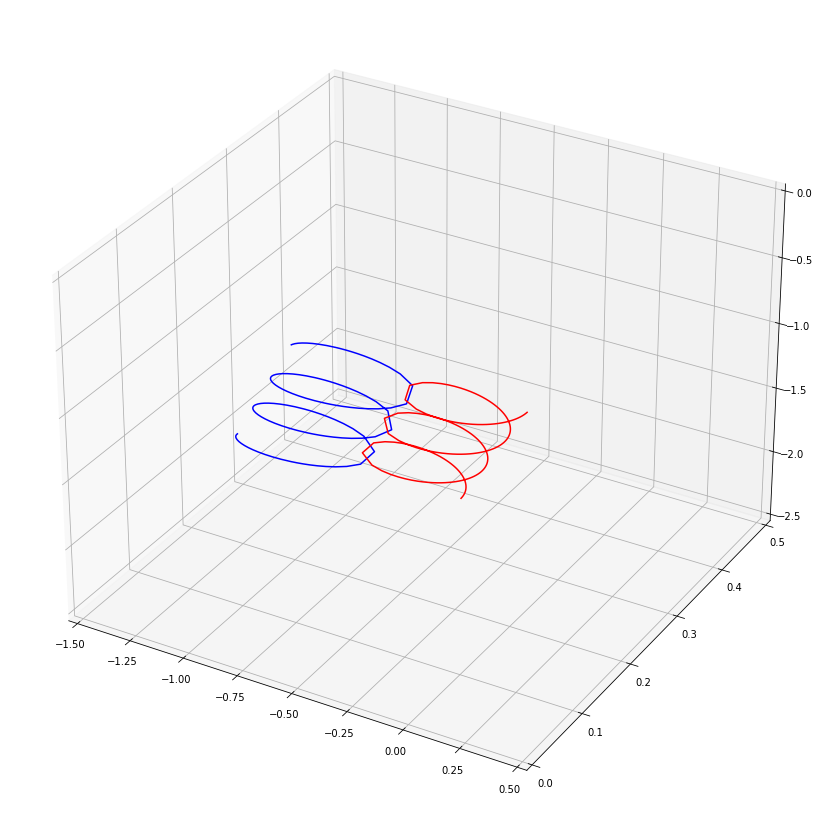

In [28]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
ax.set_xlim(-1.5,0.5)
ax.set_ylim(0,0.5)
ax.set_zlim(-2.5,0)
#Plot the orbits
# ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
# ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
 
line1, = ax.plot([], [], [], color='blue')
line2, = ax.plot([], [], [], color='red')

def animation_frame(i):
    line1.set_xdata(r1_sol[:i,0])
    line1.set_ydata(r1_sol[:i,1])
    line1.set_3d_properties(r1_sol[:i,2])
    
    line2.set_xdata(r2_sol[:i,0])
    line2.set_ydata(r2_sol[:i,1])
    line2.set_3d_properties(r2_sol[:i,2])
    return line1, line2

ani = animation.FuncAnimation(fig, animation_frame, frames=200, interval=20, blit=True)
ani.save('animation.gif', writer='pillow', fps=20)

# ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
# ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
# #Add a few more bells and whistles
# ax.set_xlabel("x-coordinate",fontsize=14)
# ax.set_ylabel("y-coordinate",fontsize=14)
# ax.set_zlabel("z-coordinate",fontsize=14)
# ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
# ax.legend(loc="upper left",fontsize=14)